In [383]:
import pandas as pd 
import numpy as no 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
from sklearn.metrics import r2_score

%matplotlib inline

In [384]:
train = pd.read_csv("datasets/train.csv")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [385]:
def column_cleaner(data): 
    data.columns=map(str.lower, data.columns)
    data.columns = data.columns.str.strip().str.replace(" ","_")


In [386]:
column_cleaner(train)

In [387]:
def fill_na(data): 
    data[['garage_qual', 'garage_cond']] = data[['garage_qual', 'garage_cond']].fillna(value = 0)
    data['mas_vnr_area'] = data[["mas_vnr_area"]].fillna(value = 0)
    data['bsmt_qual'] = data[["bsmt_qual"]].fillna(value = 0)
    data['bsmt_cond'] = data[["bsmt_cond"]].fillna(value = 0)
    return data

In [388]:
fill_na(train)

In [389]:
train.drop(index = [1712], inplace = True)

In [390]:
train.loc[train["garage_cars"].isnull()].index

Int64Index([], dtype='int64')

In [391]:
train.loc[train["total_bsmt_sf"].isnull()].index

Int64Index([1327], dtype='int64')

In [392]:
train.drop(index = [1327], inplace = True)

In [393]:
train.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [394]:
def dataframe_dictionary_input(data): 
    street_cleaned = { "Grvl" : 0,"Pave" : 1}
    data["street"] = data[["street"]].replace(street_cleaned)


    na_to_ex_rating = {"Po" : 1, "Fa" : 2,"TA" : 3, "Gd" : 4, "Ex" : 5,}
    data['bsmt_qual'] = data[['bsmt_qual']].replace(na_to_ex_rating)
    data["bsmt_cond"] = data[['bsmt_cond']].replace(na_to_ex_rating)


    heating_qc_cleaned = {"Po" : 0, "Fa" : 1,"TA" : 2, "Gd" : 3, "Ex" : 4,}
    data['heating_qc'] = data[['heating_qc']].replace(heating_qc_cleaned)

    poor_to_ex_no_na = {"Po" : 0, "Fa" : 1,"TA" : 2, "Gd" : 3, "Ex" : 4,}
    data['kitchen_qual'] = data[['kitchen_qual']].replace(poor_to_ex_no_na)

    data['exter_qual'] = data[['exter_qual']].replace(poor_to_ex_no_na)
    data['exter_cond'] = data[['exter_cond']].replace(poor_to_ex_no_na)
    
    return data 


In [395]:
dataframe_dictionary_input(train)

In [396]:
def feature_interactions(data): 
    data["garage_comb"] = data["garage_area"] * data["garage_cars"]
    data["deck_*_porch"] = data["wood_deck_sf"] * data["open_porch_sf"]
    data["exter_cond*exter_qual"] = data["exter_cond"] * train["exter_qual"]
    data["total_bsmt_sf*gr_liv_area"] = data["total_bsmt_sf"] * data["gr_liv_area"]
    data["bsmt_qual*bsmt_cond"] = data["bsmt_qual"] * train["bsmt_cond"]
    
    

In [397]:
feature_interactions(train)

In [399]:
train.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,garage_comb,deck_*_porch,exter_cond*exter_qual,total_bsmt_sf*gr_liv_area,bsmt_qual*bsmt_cond
0,109,533352170,60,RL,NaN,13517,1,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,3,2,CBlock,3,3,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,4,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,3,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500,950.0,0,6,1072275.0,9
1,544,531379050,60,RL,43.0,11492,1,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,3,2,PConc,4,3,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,4,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,3,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000,1118.0,0,6,1937386.0,12
2,153,535304180,20,RL,68.0,7922,1,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,2,3,CBlock,3,3,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,2,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,3,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000,246.0,0,6,1117249.0,9
3,318,916386060,60,RL,73.0,9802,1,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,2,2,PConc,4,3,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,3,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,2,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000,800.0,0,4,554496.0,12
4,255,906425045,50,RL,82.0,14235,1,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,2,2,PConc,2,4,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,2,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,2,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500,968.0,0,4,976820.0,8


In [406]:
def dummy_cols_maker(data, list_of_columns):
    data = pd.get_dummies(data, columns = ['neighborhood'], drop_first=True)
    data = pd.get_dummies(data, columns = ['central_air'], drop_first=True)
    data = pd.get_dummies(data, columns = ['electrical'], drop_first = True)
    data = pd.get_dummies(data, columns = ['heating'], drop_first = True)
    data = pd.get_dummies(data, columns = ['functional'], drop_first = True)
    data = pd.get_dummies(data, columns = ['exterior_1st'], drop_first = True)
    data = pd.get_dummies(data, columns = ["garage_cond"], drop_first = True )
    data = pd.get_dummies(data, columns = ["garage_qual"], drop_first = True)
    
    return data

In [409]:
train = dummy_cols_maker(data = train) 

In [410]:
train.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating_qc,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,garage_comb,deck_*_porch,exter_cond*exter_qual,total_bsmt_sf*gr_liv_area,bsmt_qual*bsmt_cond,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,central_air_Y,electrical_FuseF,electrical_FuseP,electrical_Mix,electrical_SBrkr,heating_GasW,heating_Grav,heating_OthW,heating_Wall,functional_Maj2,functional_Min1,functional_Min2,functional_Mod,functional_Sal,functional_Sev,functional_Typ,exterior_1st_AsphShn,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CBlock,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_ImStucc,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_Stone,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,garage_cond_Ex,garage_cond_Fa,garage_cond_Gd,garage_cond_Po,garage_cond_TA,garage_qual_Ex,garage_qual_Fa,garage_qual_Gd,garage_qual_Po,garage_qual_TA
0,109,533352170,60,RL,NaN,13517,1,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,Plywood,BrkFace,289.0,3,2,CBlock,3,3,No,GLQ,533.0,Unf,0.0,192.0,725.0,4,725,754,0,1479,0.0,0.0,2,1,3,1,3,6,0,NaN,Attchd,1976.0,RFn,2.0,475.0,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500,950.0,0,6,1072275.0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,544,531379050,60,RL,43.0,11492,1,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,BrkFace,132.0,3,2,PConc,4,3,No,GLQ,637.0,Unf,0.0,276.0,913.0,4,913,1209,0,2122,1.0,0.0,2,1,4,1,3,8,1,TA,Attchd,1997.0,RFn,2.0,559.0,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000,1118.0,0,6,1937386.0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,153,535304180,20,RL,68.0,7922,1,NaN,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,None,0.0,2,3,CBlock,3,3,No,GLQ,731.0,Unf,0.0,326.0,1057.0,2,1057,0,0,1057,1.0,0.0,1,0,3,1,3,5,0,NaN,Detchd,1953.0,Unf,1.0,246.0,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000,246.0,0,6,1117249.0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
3,318,916386060,60,RL,73.0,9802,1,NaN,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,None,0.0,2,2,PConc,4,3,No,Unf,0.0,Unf,0.0,384.0,384.0,3,744,700,0,1444,0.0,0.0,2,1,3,1,2,7,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000,800.0,0,4,554496.0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
4,255,90

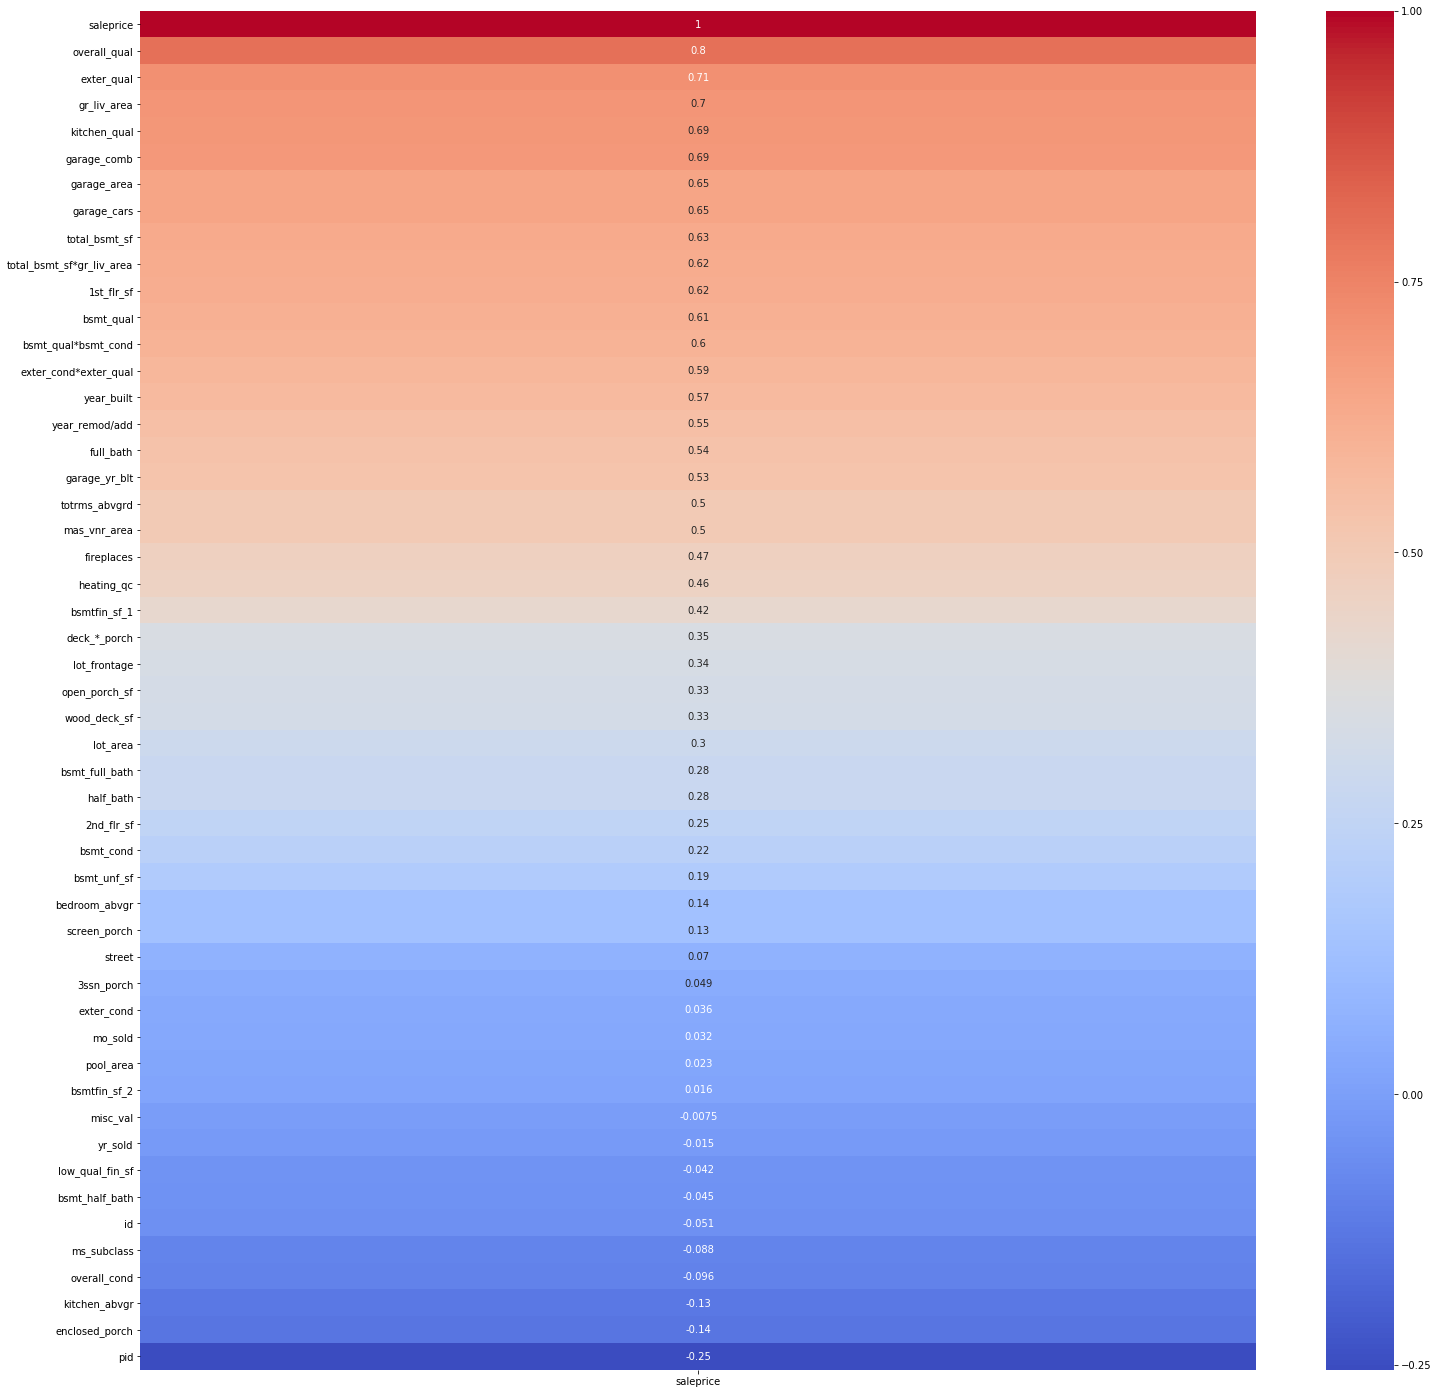

In [363]:
plt.figure(figsize = (25,25))
sns.heatmap(train.corr()[['saleprice']].sort_values(by = "saleprice" ,ascending = False), annot = True, cmap = 'coolwarm');

In [364]:
features = ['overall_qual', 'exter_qual','gr_liv_area', 'garage_comb', 'kitchen_qual', 
            'total_bsmt_sf', 'bsmt_qual', 'bsmt_cond', 'year_built', 'full_bath', 
            'year_remod/add', 'bsmt_qual*bsmt_cond']

In [365]:
#def power_transformer(): 
    #pt = PowerTransformer()
    #pt.fit(X_train)
    #X_train_pt_transformed = pt.transform(X_train)
    #X_test_pt_transformed = pt.transform(X_test)
    
    #pt_y = PowerTransformer()
    #pt_y.fit(y_train.to_frame())
    #y_train_pt_transformed = pt_y.transform(y_train.to_frame())
    #y_test_pt_transformed = pt_y.transform(y_test.to_frame())
    

In [366]:
X = train[features]
y = train['saleprice']

In [367]:
#def fitter_and_instantiator(): 
lr = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)
lr.fit(X_train, y_train)
print( lr.score(X_train, y_train))
print (lr.score(X_train, y_train))
print(cross_val_score(lr, X_train, y_train, cv = 10).mean())
    
    
    
    

    

0.8063700066887819
0.8063700066887819
0.7889420070844094


In [368]:
fitter_and_instantiator

<function __main__.fitter_and_instantiator()>

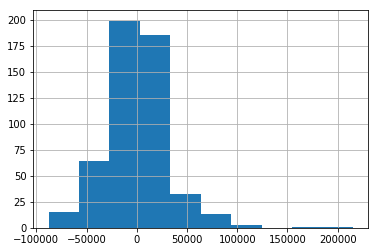

In [369]:
#def model_evaluation(): 
pred = lr.predict(X_test)
residuals = y_test-pred
residuals.hist()

In [370]:
test= pd.read_csv('datasets/test.csv')

In [371]:
column_cleaner(test)

In [372]:
dataframe_dictionary_input(test)

In [373]:
fill_na(test)

In [374]:
feature_interactions(test)

In [375]:
test.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,garage_comb,deck_*_porch,exter_cond*exter_qual,total_bsmt_sf*gr_liv_area,bsmt_qual*bsmt_cond
0,2658,902301120,190,RM,69.0,9142,1,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,2,1,Stone,2.0,3,No,Unf,0,Unf,0,1020,1020,GasA,3,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,1,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD,440,0,3.0,1966560,6.0
1,2718,905108090,90,RL,NaN,9662,1,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,2,2,CBlock,4.0,3,No,Unf,0,Unf,0,1967,1967,GasA,2,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,2,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD,1160,0,6.0,3869089,12.0
2,2414,528218130,60,RL,58.0,17104,1,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,2,PConc,4.0,4,Av,GLQ,554,Unf,0,100,654,GasA,4,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,3,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New,852,2400,4.0,978384,12.0
3,1989,902207150,30,RM,60.0,8520,1,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,3,2,CBlock,3.0,3,No,Unf,0,Unf,0,968,968,GasA,2,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,2,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD,960,0,4.0,937024,9.0
4,625,535105100,20,RL,NaN,9500,1,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,2,2,CBlock,4.0,3,No,BLQ,609,Unf,0,785,1394,GasA,3,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,2,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD,1028,0,4.0,1943236,16.0


In [377]:
#def prediction_maker(data): 
test_preds = pd.DataFrame(lr.predict(test[features]))
test['preds_1'] = test_preds

submission_x = test.loc[:, ['id', 'preds_1']]
submission_x.rename(columns = {'id': 'Id', 'preds_1': 'SalePrice'}, inplace=True)
    

In [378]:
submission_x.head()
   

,Id,SalePrice
0,2658,131122.802056
1,2718,200309.625675
2,2414,186999.402068
3,1989,130191.414270
4,625,200595.132305


In [379]:
submission_x.to_csv('./Submissions/submissions_7', index=False )